In [7]:
%cd ../../Ximena/Finite-Topological-Spaces

from Finite_Spaces.Presentations import *
from Finite_Spaces.Morse         import *

/home/gonzalo/PhD-Code/Ximena/Finite-Topological-Spaces


---

<img src="figures/figure_1.png" width="300">

In [8]:
X = SimplicialComplex([['x_0', 'x_1'], ['x_0', 'x_2'], ['x_1', 'x_2'], ['x_1', 'x_3'], ['x_2', 'x_3']])
#X = SimplicialComplex([['x_0', 'x_1', 'x_5'], ['x_0', 'x_2'], ['x_1', 'x_2'], ['x_1', 'x_3'], ['x_2', 'x_3']])
X

Simplicial complex with vertex set ('x_0', 'x_1', 'x_2', 'x_3') and 5 facets

In [9]:
X.homology()

{0: 0, 1: Z x Z}

<img src="figures/figure_2.png" width="300">

In [10]:
Y = SimplicialComplex([['x_0', 'x_1', 'x_2'], ['x_1', 'x_3'], ['x_2', 'x_3']])
Y

Simplicial complex with vertex set ('x_0', 'x_1', 'x_2', 'x_3') and 3 facets

In [11]:
Y.homology()

{0: 0, 1: Z, 2: 0}

In [12]:
Y.faces()

{-1: {()},
 0: {('x_0',), ('x_1',), ('x_2',), ('x_3',)},
 1: {('x_1', 'x_0'),
  ('x_2', 'x_0'),
  ('x_2', 'x_1'),
  ('x_1', 'x_3'),
  ('x_2', 'x_3')},
 2: {('x_2', 'x_1', 'x_0')}}

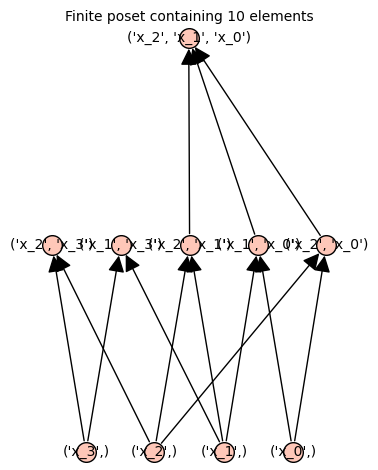

In [13]:
Y.face_poset()

---

In [14]:
RP = simplicial_complexes.RealProjectiveSpace(2)
RP

Minimal triangulation of the real projective plane

In [15]:
RP.homology()

{0: 0, 1: C2, 2: 0}

In [16]:
RP.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 2),
  (0, 1, 5),
  (0, 2, 3),
  (0, 3, 4),
  (0, 4, 5),
  (1, 2, 4),
  (1, 3, 4),
  (1, 3, 5),
  (2, 3, 5),
  (2, 4, 5)}}

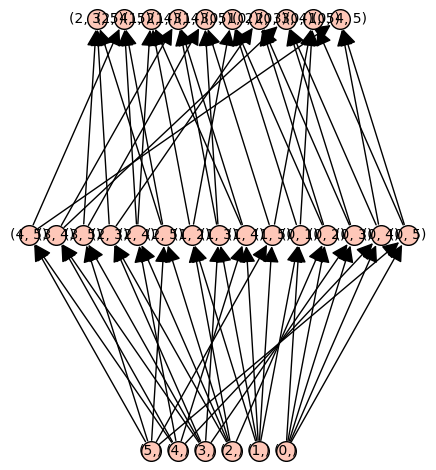

In [17]:
RP_poset = RP.face_poset()
RP_poset.show()

---

In [18]:
T = simplicial_complexes.Torus()

In [19]:
fg = T.fundamental_group()
hg = T.homology()[1]

print(type(fg))
print(type(hg))

<class 'sage.groups.finitely_presented.FinitelyPresentedGroup_with_category'>
<class 'sage.homology.homology_group.HomologyGroup_class_with_category'>


---

In [20]:
def get_morse_presentation(sc):
    print(sc)
    sc = copy(sc)
    
    try:
        sc.faces()[2]
        print('Nice original complex!')
    except:
        face = list(sc.faces()[1])[0]
        new_face = face.join(Simplex(['x']), rename_vertices=False)
        sc.add_face(new_face)
        print('Updated complex!')
        sc

    poset = sc.face_poset()
    matching = spanning_matching(poset)
        
    two_simplices = sc.faces()[2]
    att_2 = {}
    for simplex in two_simplices:
        att_2[tuple(simplex)] = [((simplex[0], simplex[1]), 1), ((simplex[1], simplex[2]), 1), ((simplex[0], simplex[2]), -1)]

    critical_cells = critical_by_level(poset, matching)
    attaching = attaching_Morse(att_2, matching, critical_cells[2])
    return att_to_group(attaching, critical_cells[1])

In [21]:
Z = SimplicialComplex([Simplex(3)])
Z

Simplicial complex with vertex set (0, 1, 2, 3) and facets {(0, 1, 2, 3)}

In [22]:
W = SimplicialComplex([['x_0', 'x_1', 'x_2', 'x_4'], ['x_1', 'x_3'], ['x_2', 'x_3'],
    ['x_1', 'x_5'], ['x_3', 'x_5']])
W

Simplicial complex with 6 vertices and 5 facets

In [23]:
m = get_morse_presentation(Z).simplified()

Simplicial complex with vertex set (0, 1, 2, 3) and facets {(0, 1, 2, 3)}
Nice original complex!


---

In [24]:
Z.homology()

{0: 0, 1: 0, 2: 0, 3: 0}

In [25]:
RP.fundamental_group()   

Finitely presented group < e1 | e1^2 >

In [26]:
type(m)

<class 'sage.groups.finitely_presented.FinitelyPresentedGroup_with_category'>

**Example 2.10** 

---

In [27]:
gens = ['x', 'y']
rels = [[('x',2)], [('x',1), ('y',-2)]]
G = group_presentation(gens, rels)
print(G)
G.simplified()

Finitely presented group < x, y | x^2, x*y^-2 >


Finitely presented group < y | y^4 >

In [28]:
gens = ['x6','x7','x8','x9','x10','x11','x12','x13','x14','x15']
rels = [
    [('x7', 1)],
    [('x6', -1), ('x7', -1), ('x8', 1)],
    [('x8', -1), ('x9', 1)],
    [('x6', -1), ('x9', -1), ('x10', 1)],
    [('x10', -1), ('x11', 1)],
    [('x11', 1), ('x12', -1)],
    [('x13', 1)],
    [('x12', 1), ('x13', -1), ('x14', 1)],
    [('x14', -1), ('x15', 1)],
    [('x12', 1), ('x15', -1)]
]
G = group_presentation(gens, rels)
print(G)
G.simplified()

Finitely presented group < x6, x7, x8, x9, x10, x11, x12, x13, x14, x15 | x7, x6^-1*x7^-1*x8, x8^-1*x9, x6^-1*x9^-1*x10, x10^-1*x11, x11*x12^-1, x13, x12*x13^-1*x14, x14^-1*x15, x12*x15^-1 >


Finitely presented group < x6 | x6^4 >

---